In [1]:
import numpy as np
from numpy.random import normal, uniform, binomial, exponential
from scipy.special import factorial
from scipy.special import comb
import matplotlib.pyplot as plt

# 1.a)
The probability density function for Binomial$(10,\frac{1}{3})$ is $$f(k) = {10\choose i}(\frac{1}{3})^i(\frac{2}{3})^{10-i}$$

The possible number of successes here are $k = 0, 1, ..., 9, 10$. For each, I calculate the CDF, which is $$F(k) = \sum_{i=0}^{k} {10\choose i}(\frac{1}{3})^i(\frac{2}{3})^{10-i}$$

For each sample from the uniform distribution, I check which interval $[F(i), F(i+1))$ it falls into and sample $k = i$.

Plotting a histogram over 1000 samples shows that the outcomes do in fact follow a Binomial$(10,\frac{1}{3})$ distribution as expected.

In [2]:
def binom_cdf(k):
    #Recursively calculate the CDF for a binomial distribution
    i = 0
    cdf = binom(i)
    while i < k:
        i += 1
        cdf += binom(i)
    return cdf
def binom(k):
    #Evaluate the PDF for Binomial(10,1/3)
    return comb(10,k)*(1/3)**k*(2/3)**(10-k)

np.random.seed(2000)
x = np.linspace(0,10,11)
probabilities = np.array([binom_cdf(k) for k in x]) #all possible outcomes
uni = uniform(0,1,1000)
outcome = np.zeros_like(uni)
for i in range(len(uni)):
    ind = 0
    while (probabilities[ind] < uni[i]) and (ind < 10):
        ind += 1
    outcome[i] = ind #select the appropriate interval & outcome for each sample

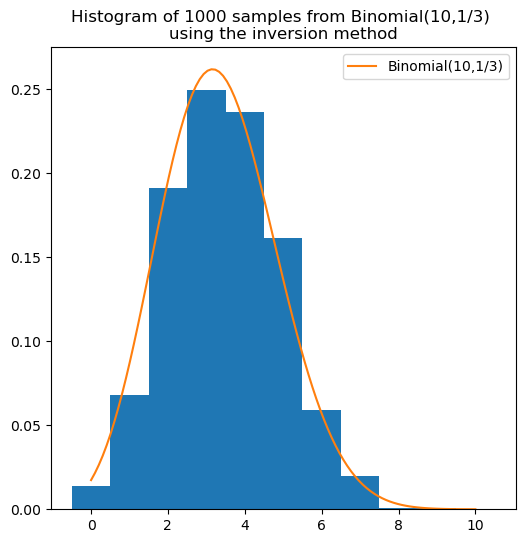

In [3]:
x2 = np.linspace(0,10,100)
plt.figure(figsize=(6,6))
plt.hist(outcome,density=True,align='left',bins=[0,1,2,3,4,5,6,7,8,9,10,11])
plt.plot(x2,binom(x2),label='Binomial(10,1/3)')
plt.title('Histogram of 1000 samples from Binomial(10,1/3) \nusing the inversion method')
plt.legend()
plt.savefig('./Stats6545_A1_1.pdf')

# 1.b)
The Binomial$(10,\frac{1}{3})$ distribution equals the sum of $10$ independent Bernoulli$(\frac{1}{3})$ distributions. This can be shown by comparing the moment generating functions of each distribution. The Bernoulli PDF is $f(k)= \begin{cases}
1/3 \text{ if } k = 1 \\
2/3 \text{ if } k = 0
\end{cases}$ and the MGF is $E_{Ber}(e^{tk}) = \frac{1}{3}e^{t(1)} + \frac{2}{3}e^{t(0)} = \frac{1}{3}e^{t} + \frac{2}{3}$.

The Binomial MGF is $E_{Bi}(e^{tx}) = \sum_{k=0}^{10} {10\choose k}(\frac{1}{3})^k(\frac{2}{3})^{10-k}e^{tk} = \sum_{k=0}^{10} {10\choose k}(\frac{e^t}{3})^i(\frac{2}{3})^{10-k} = (\frac{1}{3}e^{t} + \frac{2}{3})^{10} = (E_{Ber}(e^{tk}))^{10}$ by the binomial expansion.

I use inversion to sample a Bernoulli$(\frac{1}{3})$ distribution from a uniform distribution based on whether the uniform sample is greater than or less than $1/3$. I take 10 of these samples and take their sum as a sample from the Bernoulli distribution.

Plotting the histogram again with 1000 samples shows that this joint inversion and transformation method does result in the expected Bernoulli distribution.

Both methods seem similarly accurate.

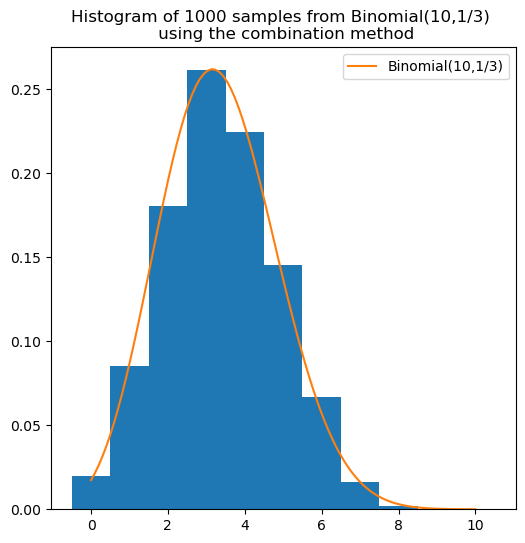

In [4]:
def bernoulli_cdf(k):
    #Evaluate the CDF for Bernoulli(1/3)
    return (0 if k < 2/3 else 1)
np.random.seed(1000)
outcome2 = np.zeros(1000)
for i in range(1000):
    uni = uniform(0,1,10)
    outcome = np.array([bernoulli_cdf(k) for k in uni]) #inversion
    outcome2[i] = np.sum(outcome) #transformation
plt.figure(figsize=(6,6))
plt.hist(outcome2,density=True,align='left',bins=[0,1,2,3,4,5,6,7,8,9,10,11])
x2 = np.linspace(0,10,100)
plt.plot(x2,binom(x2),label='Binomial(10,1/3)')
plt.title('Histogram of 1000 samples from Binomial(10,1/3) \n using the combination method')
plt.legend()
plt.savefig('./Stats6545_A1_1b.pdf')

# 1.c)
The Central Limit Theorem says that for $n$ iid variables taken from a distribution with expectation $\mu$ and variance $\sigma^2$, in the limit of large $n$, the sample mean converges to $\mu$ and the sample variance converges to $n\sigma^2$. It approximates a normal distribution N$(\mu, \sigma^2)$.

Using 100 samples from the first method, the sample mean is $3.28$, giving an estimate of the expectation of the Binomial distribution as $\mu = 3.28$. The sample variance is $2.00$ giving an estimate $\sigma^2 = 2.00/100 = 0.02$ and a standard error $\sigma = \sqrt{\sigma^2} = 0.14$. 

Using the normal approximation N$(\mu, \sigma^2)$ to the Binomial, a 95% confidence bound on the expectation is 
$(\mu \mp z_{0.025}\sigma) = (3.28 \mp 1.96*0.14) = (3.00, 3.56).$

A 99% confidence bound is $(\mu \mp z_{0.005}\sigma) = (3.28 \mp 2.576*0.14) = (2.91, 3.65).$

Both intervals contain the true expectation, $np = 10/3 = 3.33$. The true variance is $np(1-p) = 2.22.$

In [5]:
np.random.seed(1000)
x = np.linspace(0,10,11)
probabilities = np.array([binom_cdf(k) for k in x]) #all possible outcomes
uni = uniform(0,1,100)
outcome = np.zeros_like(uni)
for i in range(len(uni)):
    ind = 0
    while (probabilities[ind] < uni[i]) and (ind < 10):
        ind += 1
    outcome[i] = ind #select the appropriate interval & outcome for each sample

mu = np.mean(outcome)
v = np.var(outcome)
sigma = np.sqrt(v/100)
print(mu)
print(v)
print(sigma)

3.28
2.0016
0.14147791347061914


In [6]:
print(mu - 1.96*sigma, mu + 1.96*sigma)
print(mu - 2.576*sigma, mu + 2.576*sigma)

3.0027032895975863 3.5572967104024134
2.915552894899685 3.6444471051003147


# 2.) 

The Poisson distribution is $f(k,\lambda) = e^{-\lambda}*\frac{\lambda^k}{k!}$. We know that if $X_i$ are Exponential$(1)$ iid random variables, taking the sum $S_n = \sum_{i=1}^{n}X_i$ gives a probability $P(S_n \le t \le S_{n+1}) = e^{-\lambda}*\frac{\lambda^k}{k!}$, which is precisely the Poisson probability. Exponential$(1)$ has PDF $f(x) = 
\begin{cases}
e^{-x} \text{ if } 0 \le x \\
0 \:\:\:\:\: \text{ if } x < 0
\end{cases}$. If $u$ is drawn from Uniform$[0,1]$, then $x = -\ln(1-u)$ follows Exponential$(1)$ using the inversion method. Taking repeated samples until their sum is greater than $t=1$ gives a sample from the Poisson$(t)$ distribution.

A histogram with 1000 samples shows that the generated samples do follow the Poisson$(t)$ distribution. As before, I apply the central limit theorem to obtain confidence bounds on the mean.)

For $n=10$ samples, the mean is $1.1$, the standard error is $0.2769$, and the 95% confidence bounds are $(0.5573,1.6427)$.

For $n=100$ samples, the mean is $0.81$, the standard error is $0.095$, and the 95% confidence bounds are $(0.6238,0.9962)$.

For $n=1000$ samples, the mean is $0.977$, the standard error is $0.0316$, and the 95% confidence bounds are $(0.915,1.039)$.

For $n=10000$ samples, the mean is $1.0022$, the standard error is $0.01$, and the 95% confidence bounds are $(0.9826,1.0218)$.

As the number of samples increases, the mean approaches the true mean $t = 1$ of the Poisson distribution as expected from the central limit theorem.

In [7]:
def poisson(k,λ=1):
    #Evaluate the Poisson(k) distribution
    return (λ**k)*np.exp(-λ)/factorial(k)

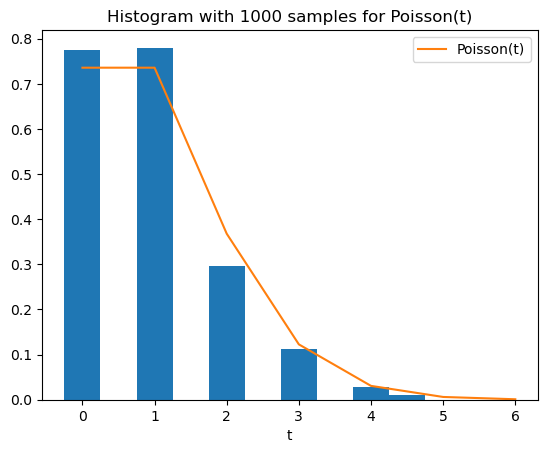

In [8]:
np.random.seed(2000)
n = 1000
counts = np.zeros(n)
k = np.linspace(0,6,7)
for i in range(n):
    sum = 0
    count = 0
    while sum < 1: #transformation
        sum += -np.log(1-uniform(0,1,1)) #inversion
        count += 1
    counts[i] = count-1
plt.hist(counts,density=True,align='left',bins=10)
plt.plot(k,2*poisson(k,1),label='Poisson(t)')
plt.xlabel('t')
plt.title('Histogram with 1000 samples for Poisson(t)')
plt.legend()
plt.savefig('./Stats6545_A1_2.pdf')

In [9]:
np.random.seed(5000)
for n in [10,100,1000,10000]:
    counts = np.zeros(n)
    k = np.linspace(0,6,7)
    for i in range(n):
        sum = 0
        count = 0
        while sum < 1: #transformation
            sum += -np.log(1-uniform(0,1,1)) #inversion
            count += 1
        counts[i] = count-1
    m = np.mean(counts)
    std = np.std(counts,ddof=1)/np.sqrt(n)
    low = m - 1.96*std
    high = m + 1.96*std
    print(f'For n={n} samples, the mean is {m}, the standard error is {round(std,4)}, and the 95% confidence bounds are ({round(low,4)},{round(high,4)})')

For n=10 samples, the mean is 1.1, the standard error is 0.2769, and the 95% confidence bounds are (0.5573,1.6427)
For n=100 samples, the mean is 0.81, the standard error is 0.095, and the 95% confidence bounds are (0.6238,0.9962)
For n=1000 samples, the mean is 0.977, the standard error is 0.0316, and the 95% confidence bounds are (0.915,1.039)
For n=10000 samples, the mean is 1.0022, the standard error is 0.01, and the 95% confidence bounds are (0.9826,1.0218)


# 3.a)
$$\begin{align} \pi(x) &= \frac{0.2}{\sqrt{2\pi \times0.5}}\exp(\frac{-(x-1)^2}{2\times0.5}) + \frac{0.8}{\sqrt{2\pi \times0.1}}\exp(\frac{-(x-2)^2}{2*0.1}) \\
&\approx 0.113\exp(-(x-1)^2) + 1.009\exp(-5(x-2)^2)\end{align}$$

In [10]:
def mix(x):
    #Evaluate the target 
    return 0.2/(np.sqrt(np.pi))*np.exp(-(x-1)**2) + 0.8/(np.sqrt(0.2*np.pi))*np.exp((-(x-2)**2)/0.2)

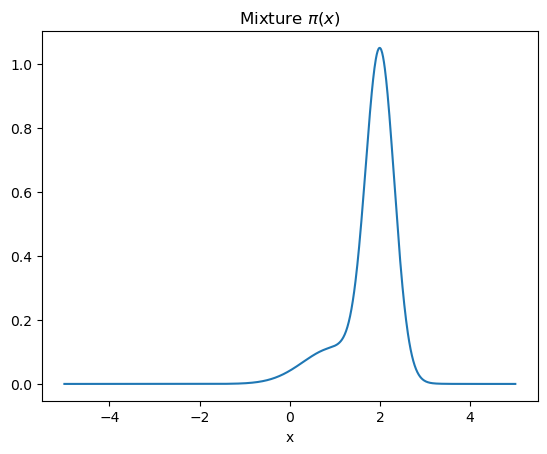

In [11]:
x = np.linspace(-5,5,1000)
plt.plot(x,mix(x))
plt.title("Mixture $\pi(x)$")
plt.xlabel("x")
plt.savefig('./Stats6545_A1_3a_1.pdf')

The second component of the mixture, $N_2(2,0.1)$, contributes much more to the density than the first component $N_1(1,0.5)$, and so I choose to center my proposal normal distribution $q$ around $x = 2 = \mu$. The variance needs to be chosen to include the higher density to the left of $x = 2$.

The first distribution $N_1(1,0.5)$ has three standard deviations in $(\mu_1 \mp 3\sigma_1) = (1 \mp 3\sqrt{0.1}) = (-1.12, 3.12)$. For the proposal to include this region, I want to have $\mu - 3\sigma = 2 - 3\sigma \approx -1.12$, or $\sigma = \sigma^2 = 1$. That gives my proposal as $N(2,1)$.

I want to bound $\pi(x) \le M*q(x)$. To ensure this, I need $\pi(2) \le M*q(2) \implies 1.051 \le M/\sqrt{2\pi} \implies M \ge 2.63$.
To be safe, I take $M = 2.65$.

In [12]:
print(mix(2))
print(mix(2)*np.sqrt(2*np.pi))

1.0507637585501237
2.6338741471392817


In [13]:
def q_mix(x):
    #Evaluate the proposal q(x) for the mixture π(x).
    return (1/np.sqrt(2*np.pi))*np.exp(-(x-2)**2/2)

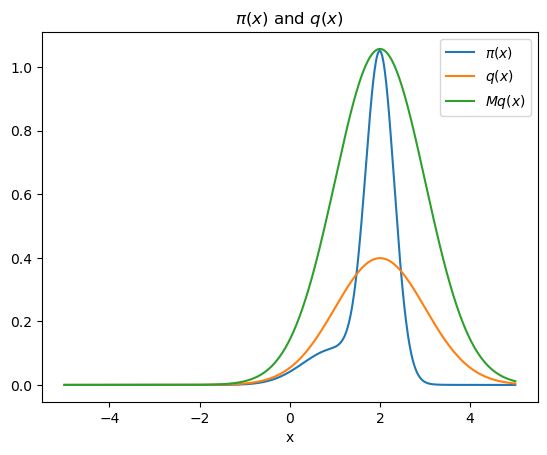

In [14]:
M = 2.65
plt.plot(x,mix(x),label='$\pi(x)$')
plt.plot(x,q_mix(x),label='$q(x)$')
plt.plot(x,M*q_mix(x),label='$Mq(x)$')
plt.title("$\pi(x)$ and $q(x)$")
plt.xlabel("x")
plt.legend()
plt.savefig('./Stats6545_A1_3a_2.pdf')

In [15]:
np.random.seed(4000)
sample = normal(2,1,100000)
unif = uniform(0,1,100000)
accepted = sample[unif <= mix(sample)/(M*q_mix(sample))]

I verify the correctness of the sampler by comparing a histogram to the mixture $\pi(x)$.

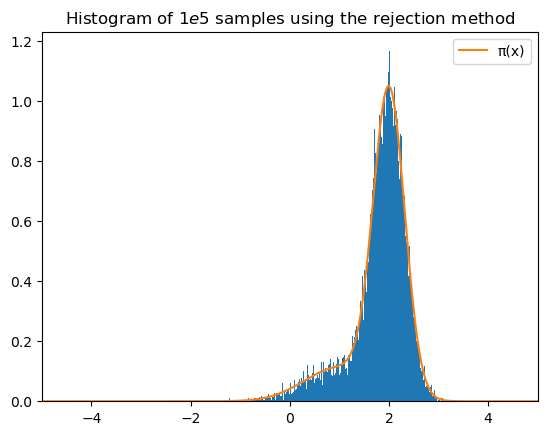

In [16]:
plt.hist(accepted,bins=1000,density=True)
plt.plot(x,mix(x),label='π(x)')
plt.xlim(-5,5)
plt.title('Histogram of $1e5$ samples using the rejection method')
plt.legend()
plt.savefig('./Stats6545_A1_3a_3.pdf')

In [17]:
rate = 0
np.random.seed(100)
for i in range(10):
    sample = normal(2,1,100000)
    unif = uniform(0,1,100000)
    accepted = sample[unif <= mix(sample)/(M*q_mix(sample))]
    rate += len(accepted)
print(rate/1000000)

0.377276


The acceptance rate is $0.377 = 1/M$ as expected.

# 3.b)
The proposal here is $q(x) = \lambda\exp(-\lambda x)$ on $x\ge 0$, the density of $Y$. The density of $X$ is $\pi(x) = \lambda\exp(-\lambda (x-a))$ on $x \ge a > 0$. On $x\ge a$, we get $\pi(x) = \lambda \exp(-\lambda x) \exp(\lambda a) = q(x)\exp(\lambda a)$.

The bound $\pi(x) \le Mq(x)$ gives $0 \le Mq(x) \implies 0 \le M$ on $x < a$. On $x\ge a$ it gives $q(x)\exp(-\lambda a) \le Mq(x) \implies \exp(-\lambda a) \le M$. I take $M = \exp(\lambda a) \ge 0$.

This choice of $M$ gives acceptance criteria as

$$\frac{\pi(x)}{Mq(x)} = 
\begin{cases}
0 \text{ if } 0 < x < a \\
1 \text{ if } x \ge a
\end{cases}$$

The acceptance rate is $1/M = \exp(-\lambda a)$ which decreases exponentially as $a$ increases. This means the efficiency of the sampler decreases significantly as $a$ increases. The target $\pi(x)$ shifts further with $a$ while the proposal $q(x)$ is independent of $a$, so there is a larger region $0 < x < a$ where the proposal will be much greater than $\pi(x) = 0$.

In [18]:
def expo(x,λ=1,a=0):
    #Evaluate the density of Exponential(λ) or the shifted version
    y = np.zeros_like(x)
    y[x >= a] = λ*np.exp(-λ*(x[x >= a]-a))
    return y

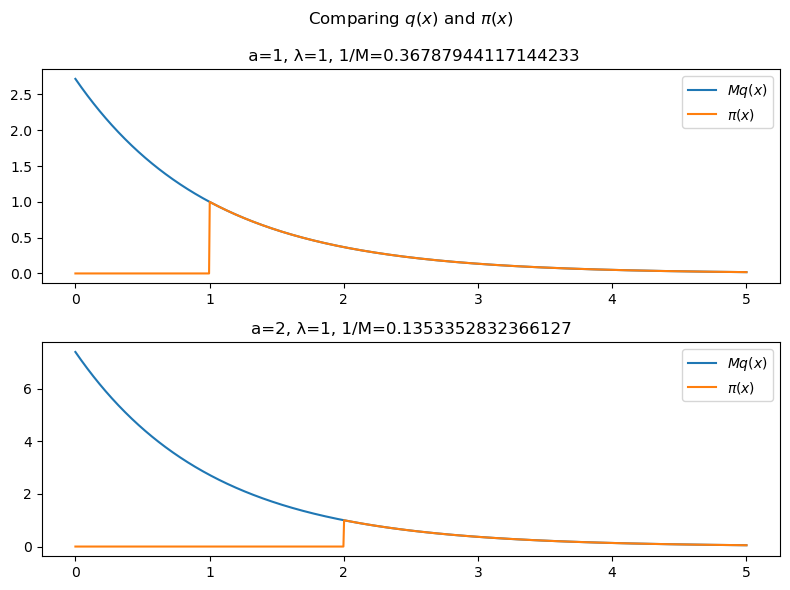

In [19]:
fig, ax = plt.subplots(2,figsize=(8,6))
λ = 1
a = 1
iM = np.exp(-λ*a)
x = np.linspace(0,5,1000)
ax[0].plot(x,np.exp(λ*a)*expo(x, λ, 0),label='$Mq(x)$')
ax[0].plot(x,expo(x, λ, a),label='$π(x)$')
ax[0].legend()
ax[0].set_title(f'Comparing $q(x)$ and $π(x)$\n\n a={a}, λ={λ}, 1/M={iM}')
λ = 1
a = 2
iM = np.exp(-λ*a)
ax[1].plot(x,np.exp(λ*a)*expo(x, λ, 0),label='$Mq(x)$')
ax[1].plot(x,expo(x, λ, a),label='$π(x)$')
ax[1].legend()
ax[1].set_title(f'a={a}, λ={λ}, 1/M={iM}')
fig.tight_layout()
plt.savefig('./Stats6545_A1_3b_1.pdf')

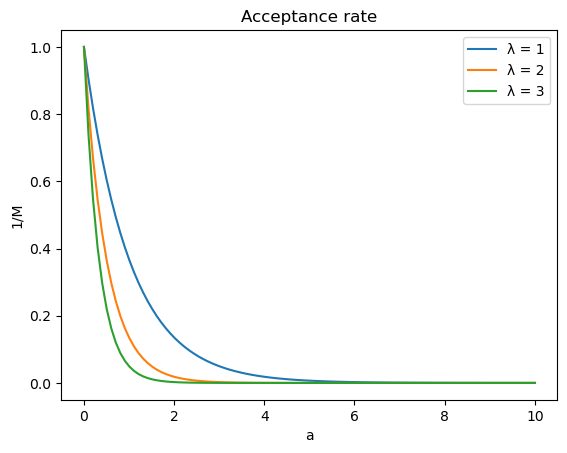

In [20]:
x = np.linspace(0,10,100)
plt.plot(x,np.exp(-1*x),label='λ = 1')
plt.plot(x,np.exp(-2*x),label='λ = 2')
plt.plot(x,np.exp(-3*x),label='λ = 3')
plt.legend()
plt.title('Acceptance rate')
plt.xlabel('a')
plt.ylabel('1/M')
plt.savefig('./Stats6545_A1_3b_2.pdf')

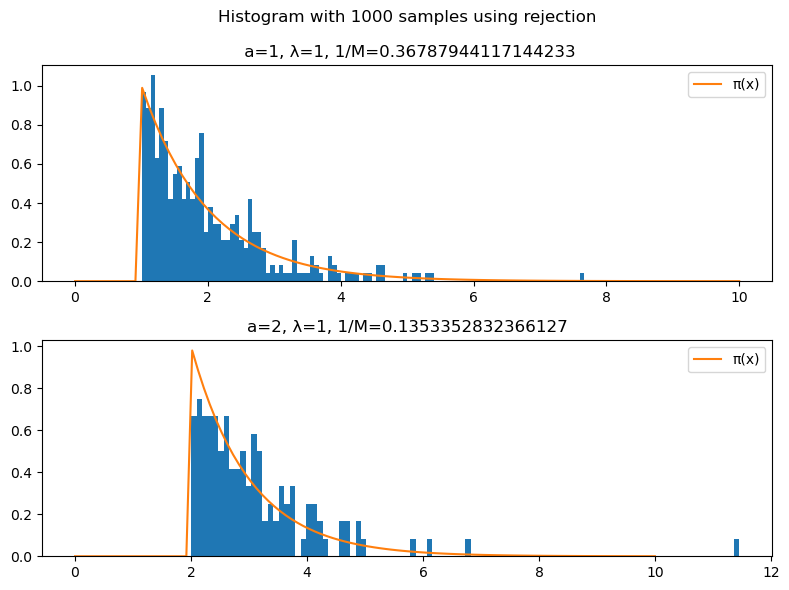

In [21]:
fig, ax = plt.subplots(2,figsize=(8,6))
np.random.seed(4000)
λ = 1
a = 1
M = np.exp(λ*a)
sample = exponential(λ,1000)
unif = uniform(0,1,1000)
accepted = sample[unif <= expo(sample, λ, a)/(M*expo(sample, λ, 0))]
ax[0].hist(accepted,bins=100,density=True)
ax[0].plot(x,expo(x,λ,a),label='π(x)')
ax[0].legend()
ax[0].set_title(f'Histogram with 1000 samples using rejection\n\n a={a}, λ={λ}, 1/M={1/M}')
λ = 1
a = 2
M = np.exp(λ*a)
sample = exponential(λ,1000)
unif = uniform(0,1,1000)
accepted = sample[unif <= expo(sample, λ, a)/(M*expo(sample, λ, 0))]
ax[1].hist(accepted,bins=100,density=True)
ax[1].plot(x,expo(x,λ,a),label='π(x)')
ax[1].legend()
ax[1].set_title(f'a={a}, λ={λ}, 1/M={1/M}')
fig.tight_layout()
plt.savefig('./Stats6545_A1_3b_3.pdf')